In [3]:
from pydataset import data
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.metrics import explained_variance_score
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
 



### 1) Load the tips dataset from either pydataset or seaborn

In [4]:
df = data('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### 2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. You may follow these steps to do that:

- fit the model to your data, where x = total_bill and y = tip: regr = ols('y ~ x', data=df).fit()

In [7]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
regr = ols('tip ~ total_bill', data= df).fit()
type(regr)

statsmodels.regression.linear_model.RegressionResultsWrapper

- compute yhat, the predictions of tip using total_bill: df['yhat'] = regr.predict(df.x)

In [9]:
df['yhat'] = regr.predict(df.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


### 4) Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)

In [10]:
def plot_residuals(x,y):
    sns.residplot(x,y)

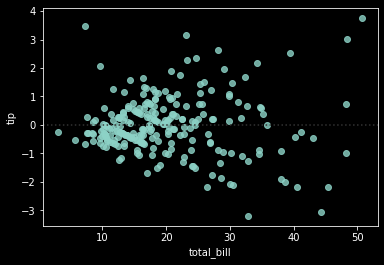

In [11]:
#test
plot_residuals(df.total_bill, df.tip)

### 5) Write a function, regression_errors(y, yhat), that takes in y and yhat, returns the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE) and root mean squared error (RMSE).

In [12]:
def regression_errors(y,yhat):
    sse = ((yhat - y)**2).sum()
    ess = ((yhat - y.mean())**2).sum()
    tss = sse + ess
    mse = sse/len(y)
    rmse = math.sqrt(mse)
    return {'sse': sse, 'ess': ess, 'tss': tss, 'mse' : mse, 'rmse' : rmse }

In [13]:
#test
reg_err = regression_errors(df.tip, df.yhat)
reg_err

{'sse': 252.788743850776,
 'ess': 212.4237331984042,
 'tss': 465.21247704918017,
 'mse': 1.036019442011377,
 'rmse': 1.0178504025697377}

### 6) Write a function, baseline_mean_errors(y), that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).

In [14]:
def baseline_mean_errors(y):
    yhat = y.mean()
    sse = ((yhat - y)**2).sum()
    mse = sse/len(y)
    rmse = math.sqrt(mse)
    return {'sse': sse, 'mse' : mse, 'rmse' : rmse }

In [15]:
#test
base_err = baseline_mean_errors(df.tip)
base_err

{'sse': 465.2124770491804,
 'mse': 1.906608512496641,
 'rmse': 1.3807999538298954}

### 7) Write a function, better_than_baseline(SSE), that returns true if your model performs better than the baseline, otherwise false.

In [16]:
def better_than_baseline(y, yhat):
    sse = ((yhat - y)**2).sum()
    base_sse = ((y.mean() - y)**2).sum()
    return sse < base_sse

In [17]:
better_than_baseline(df.tip, df.yhat)

True

### 8) Write a function, model_significance(ols_model), that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether the correlation between the model and the tip value are statistically significant.

In [18]:
def model_significance(y, yhat, ols_model):
    evs = explained_variance_score(y, yhat)
    f_pval = ols_model.f_pvalue
    
    return {'exp_var' : evs, 'f_pval' : f_pval}

In [19]:
#test 
model_significance(df.tip, df.yhat, regr)

{'exp_var': 0.4566165863516767, 'f_pval': 6.692470646863376e-34}